In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# encoding: utf-8
import pandas as pd
from pandas import *
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt


pd.set_option('display.width', None)  # 设置字符显示宽度
pd.set_option('display.max_rows', None)  # 设置显示最大行
pd.set_option('display.max_columns', None)  # 设置显示最大行

client = MongoClient('localhost', 27017)
db = client.futures3
jd= db.jd

start='20200310'
broker2=['宏源期货','方正中期','英大期货','美尔雅期货','格林大华']

jd = DataFrame(list(jd.find({'trade_date': {'$gte': start}})))

jd=jd.loc[jd['broker']!='期货公司会员']
jd['净持仓']=jd.apply(lambda x: x['long_hld'] - x['short_hld'], axis=1)

# jd=jd.sort_values('净持仓',inplace=False)
# jd=jd[jd['symbol']=='JD2005']


In [3]:

jd=jd[jd['净持仓']<0]
sums =jd.groupby(['trade_date', 'symbol'])['净持仓'].sum().reset_index(name='净空汇总')

df=pd.DataFrame()
for i in broker2:
    try:
        brokers = jd[jd['broker'] == i]
        df2=pd.DataFrame(brokers)
        df = df.append(df2)
    except:
        pass
sums2 = df.groupby(['trade_date', 'symbol'])['净持仓'].sum().reset_index(name='五少净空')
merge = pd.merge(sums2, sums, on=['trade_date', 'symbol'], how='outer').fillna(0)
merge['五少占比']=merge.apply(lambda x: x['五少净空']/x['净空汇总'], axis=1)
merge=merge[merge['symbol']=='JD2006']
merge


,trade_date,symbol,五少净空,净空汇总,五少占比
1,20200310,JD2006,-1535.0,-8016.0,0.191492
3,20200311,JD2006,-4101.0,-12013.0,0.341380
5,20200312,JD2006,-5229.0,-14552.0,0.359332
7,20200313,JD2006,-5616.0,-15565.0,0.360810
9,20200316,JD2006,-3313.0,-12690.0,0.261072
11,20200317,JD2006,-3239.0,-13973.0,0.231804
13,20200318,JD2006,-4248.0,-17244.0,0.246347
15,20200319,JD2006,-4480.0,-17055.0,0.262680
17,20200320,JD2006,-3746.0,-22897.0,0.163602
19,20200323,JD2006,-4342.0,-21934.0,0.197958


<IPython.core.display.Javascript object>


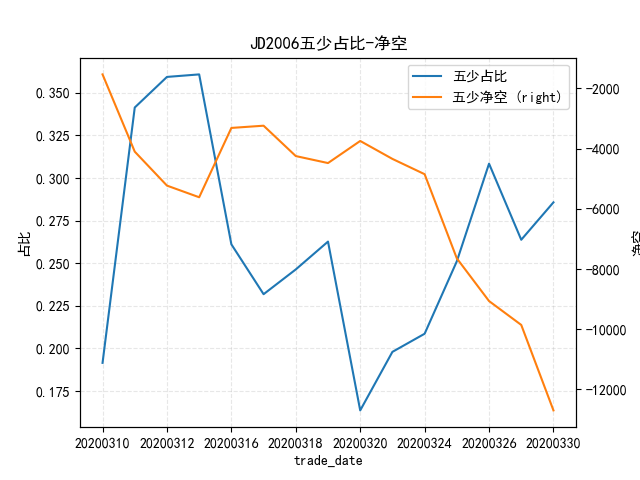

In [4]:
%matplotlib notebook
#二行即可搞定画图中文乱码
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# 画图
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

a= pd.DataFrame({'五少占比':np.array(merge['五少占比']),'五少净空':np.array(merge['五少净空'])},index=merge['trade_date'])
ax = a.plot(
    secondary_y=['五少净空'],
    x_compat=True,
    grid=True)

ax.set_title(merge['symbol'].iloc[0]+"五少占比-净空")
ax.set_ylabel('占比')
ax.grid(linestyle="--", alpha=0.3)

ax.right_ax.set_ylabel('净空')
plt.show()

In [5]:
# jd=jd[jd['trade_date']=='20200327']


# sort=jd.sort_values('净持仓',inplace=False)
# plt.bar(range(len(sort['净持仓'])),sort['净持仓'])
# plt.xticks(range(len(sort['broker'])),sort['broker'])
# # plt.xlabel('品种')
# plt.ylabel('净持仓价值比例')
# plt.title(' 净持仓 '+sort['trade_date'].iloc[0])
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# plt.show()

In [6]:
# encoding: utf-8
import pandas as pd
from pandas import *
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt


pd.set_option('display.width', None)  # 设置字符显示宽度
pd.set_option('display.max_rows', None)  # 设置显示最大行
pd.set_option('display.max_columns', None)  # 设置显示最大行

client = MongoClient('localhost', 27017)
db = client.futures3
jd= db.jd

start='20200310'
broker2=['宏源期货','方正中期','英大期货','格林大华']

jd = DataFrame(list(jd.find({'trade_date': {'$gte': start}})))

jd=jd.loc[jd['broker']!='期货公司会员']
jd['净持仓']=jd.apply(lambda x: x['long_hld'] - x['short_hld'], axis=1)

# jd=jd.sort_values('净持仓',inplace=False)
# jd=jd[jd['symbol']=='JD2005']

jd=jd[jd['净持仓']<0]
sums =jd.groupby(['trade_date', 'symbol'])['净持仓'].sum().reset_index(name='净空汇总')

df=pd.DataFrame()
for i in broker2:
    try:
        brokers = jd[jd['broker'] == i]
        df2=pd.DataFrame(brokers)
        df = df.append(df2)
    except:
        pass
sums2 = df.groupby(['trade_date', 'symbol'])['净持仓'].sum().reset_index(name='4少净空')
merge = pd.merge(sums2, sums, on=['trade_date', 'symbol'], how='outer').fillna(0)
merge['4少占比']=merge.apply(lambda x: x['4少净空']/x['净空汇总'], axis=1)
merge=merge[merge['symbol']=='JD2006']
merge


,trade_date,symbol,4少净空,净空汇总,4少占比
1,20200310,JD2006,-1535.0,-8016.0,0.191492
3,20200311,JD2006,-3245.0,-12013.0,0.270124
5,20200312,JD2006,-4392.0,-14552.0,0.301814
7,20200313,JD2006,-4728.0,-15565.0,0.303758
9,20200316,JD2006,-2557.0,-12690.0,0.201497
11,20200317,JD2006,-2541.0,-13973.0,0.181851
13,20200318,JD2006,-3453.0,-17244.0,0.200244
15,20200319,JD2006,-3798.0,-17055.0,0.222691
17,20200320,JD2006,-3746.0,-22897.0,0.163602
19,20200323,JD2006,-4342.0,-21934.0,0.197958
